In [50]:

from io import StringIO
import requests
import json
import pandas as pd

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_aaf107bc64fc441fad5810cd614fae32(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_d2000d9eeba211104c2a56ff7279427ea116fd86','domain': {'id': '2e44ce6d0e074db6b712ddcf117af4f7'},
            'password': 'LC{LJz0UJn,5QJ]u'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

df_data_1 = pd.read_csv(get_object_storage_file_with_credentials_aaf107bc64fc441fad5810cd614fae32('DefaultProjectmelavoyrajaphuskyneuedu', 'classification.csv'))
df_data_1.head()


,Amount_Requested,Employment_Length,Application_Date,Zip_Code,State,Debt-To-Income-Ratio,Policy_Code,grant_loan,Fico_Score
0,2950.0,0.0,Dec-2010,703,LA,21.06,1,0,712
1,20000.0,10.0,Dec-2010,636,MO,13.39,1,0,667
2,3500.0,10.0,Dec-2010,493,MI,11.62,1,0,697
3,5000.0,5.0,Dec-2010,64,CT,15.71,1,0,667
4,2500.0,6.0,Dec-2010,287,NC,18.49,1,0,677


In [51]:

# @hidden_cell
credentials_1 = {
  'auth_url':'https://identity.open.softlayer.com',
  'project':'object_storage_aaf107bc_64fc_441f_ad58_10cd614fae32',
  'project_id':'f94e9498f2b7446b8a6ba13cd5cef75c',
  'region':'dallas',
  'user_id':'362912a58409447e91f678215990225f',
  'domain_id':'2e44ce6d0e074db6b712ddcf117af4f7',
  'domain_name':'1257753',
  'username':'member_d2000d9eeba211104c2a56ff7279427ea116fd86',
  'password':"""LC{LJz0UJn,5QJ]u""",
  'container':'DefaultProjectmelavoyrajaphuskyneuedu',
  'tenantId':'undefined',
  'filename':'classification.csv'
}


In [52]:
import sys
import datetime as dt
import pandas as pd
import urllib.request
import zipfile, io
import csv
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn import svm
from sklearn import metrics
from sklearn import neural_network
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split

In [53]:
df_data_1.dtypes

Amount_Requested        float64
Employment_Length       float64
Application_Date         object
Zip_Code                  int64
State                    object
Debt-To-Income-Ratio    float64
Policy_Code               int64
grant_loan                int64
Fico_Score                int64
dtype: object

In [9]:
df_data_1[df_data_1.isnull()].shape

(5987425, 9)

In [54]:
df_data_1['State_Factorized'] = pd.factorize(df_data_1['State'])[0]
df_data_1['Employment_Length'].fillna(0, inplace=True)

In [55]:
miss_percent = 100 * df_data_1.isnull().sum() / len(df_data_1)
print(miss_percent)

Amount_Requested        0.0
Employment_Length       0.0
Application_Date        0.0
Zip_Code                0.0
State                   0.0
Debt-To-Income-Ratio    0.0
Policy_Code             0.0
grant_loan              0.0
Fico_Score              0.0
State_Factorized        0.0
dtype: float64


In [56]:
def logisticRegression(x_train, y_train):
    print('Logistic Regression model computation has started')
    model = LogisticRegression()
    model.fit(x_train,y_train)
    print('Logistic Regression model computation has completed')    
    return (model, 'Logistic Regression')
    #return model
def predictAndEvaluate(model,x_test,y_test):
    # predict class labels for the test set
    print('Model testing has started')
    predicted = model.predict(x_test)
    probs = model.predict_proba(x_test)[:, 1]
    print('Model testing has completed')
    # generate evaluation metrics
    accu_score = metrics.accuracy_score(y_test, predicted)
    print('Accuracy Score: ' + str(accu_score))
    cm = metrics.confusion_matrix(y_test, predicted)
    print('Confusion Matrix:')
    print(cm)
    y_test = y_test.astype(np.float)
    fpr, tpr, _ = metrics.roc_curve(y_test, probs)
    #Plot ROC curve
    %matplotlib inline
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()
    return (accu_score,cm)

In [57]:
def randomForestClassifier(x_train, y_train):
    print('Random Forest model computation has started')    
    model = RandomForestClassifier(n_jobs=2)
    model = model.fit(x_train,y_train)
    print('Random Forest model computation has completed')    
    return (model, 'Random Forest Classifier')

In [58]:
def neuralNetClassifier(x_train, y_train):
    print('Neural Network based Classification model computation has started')     
    model = neural_network.MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
    model = model.fit(x_train, y_train)
    print('Neural Network based Classification model computation has completed')     
    return (model,'Neural Network Classifier')

In [59]:
def svc(x_train, y_train):
    print('Support Vector Classification model computation has started')    
    model = svm.SVC(probability=True)
    model = model.fit(x_train, y_train) 
    print('Support Vector Classification model computation has completed')     
    return (model,'Support Vector Classification')

In [62]:
df_data_1[df_data_1.grant_loan==1]

,Amount_Requested,Employment_Length,Application_Date,Zip_Code,State,Debt-To-Income-Ratio,Policy_Code,grant_loan,Fico_Score,State_Factorized
2720,5000.0,10.0,Dec-2011,860,AZ,27.65,1,1,737,15
2721,2500.0,0.0,Dec-2011,309,GA,1.00,1,1,742,8
2722,2400.0,10.0,Dec-2011,606,IL,8.72,1,1,737,9
2723,10000.0,10.0,Dec-2011,917,CA,20.00,1,1,692,7
2724,3000.0,1.0,Dec-2011,972,OR,17.94,1,1,697,35
2725,5000.0,3.0,Dec-2011,852,AZ,11.20,1,1,732,15
2726,7000.0,8.0,Dec-2011,280,NC,23.51,1,1,692,4
2727,3000.0,9.0,Dec-2011,900,CA,5.35,1,1,662,7
2728,5600.0,4.0,Dec-2011,958,CA,5.55,1,1,677,7
2729,5375.0,0.0,Dec-2011,774,TX,18.08,1,1,727,12


In [63]:
df_data_1[df_data_1.grant_loan==0]

,Amount_Requested,Employment_Length,Application_Date,Zip_Code,State,Debt-To-Income-Ratio,Policy_Code,grant_loan,Fico_Score,State_Factorized
0,2950.0,0.0,Dec-2010,703,LA,21.06,1,0,712,0
1,20000.0,10.0,Dec-2010,636,MO,13.39,1,0,667,1
2,3500.0,10.0,Dec-2010,493,MI,11.62,1,0,697,2
3,5000.0,5.0,Dec-2010,64,CT,15.71,1,0,667,3
4,2500.0,6.0,Dec-2010,287,NC,18.49,1,0,677,4
5,5000.0,7.0,Dec-2010,194,PA,15.77,1,0,667,5
6,15000.0,4.0,Dec-2010,986,WA,4.55,1,0,697,6
7,10000.0,5.0,Dec-2010,906,CA,21.11,1,0,662,7
8,3000.0,10.0,Dec-2010,300,GA,18.44,1,0,682,8
9,5000.0,3.0,Dec-2010,916,CA,19.91,1,0,697,7


In [16]:
# Create the RFE object and rank each pixel
lr = LogisticRegression()
rfe = RFE(estimator=lr, n_features_to_select=5, step=2)
rfe.fit(df_data_1[['Amount_Requested','Employment_Length','Zip_Code','Debt-To-Income-Ratio','Policy_Code','Fico_Score','State_Factorized']],np.array(df_data_1['grant_loan']))
#ranking = rfe.ranking_.reshape(digits.images[0].shape)
ranking = rfe.ranking_
ranking_out = zip(map(lambda x: round(x, 4), rfe.ranking_), ['Amount_Requested','Employment_Length','Zip_Code','Debt-To-Income-Ratio','Policy_Code','Fico_Score','State_Factorized'])
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), ['Amount_Requested','Employment_Length','Zip_Code','Debt-To-Income-Ratio','Policy_Code','Fico_Score','State_Factorized'])))

[(1, 'Debt-To-Income-Ratio'), (1, 'Employment_Length'), (1, 'Fico_Score'), (1, 'Policy_Code'), (1, 'State_Factorized'), (2, 'Amount_Requested'), (2, 'Zip_Code')]


In [17]:
# Create the RFE object and rank each pixel
lr = RandomForestClassifier()
rfe = RFE(estimator=lr, n_features_to_select=5, step=2)
rfe.fit(df_data_1[['Amount_Requested','Employment_Length','Zip_Code','Debt-To-Income-Ratio','Policy_Code','Fico_Score','State_Factorized']],np.array(df_data_1['grant_loan']))
#ranking = rfe.ranking_.reshape(digits.images[0].shape)
ranking = rfe.ranking_
ranking_out = zip(map(lambda x: round(x, 4), rfe.ranking_), ['Amount_Requested','Employment_Length','Zip_Code','Debt-To-Income-Ratio','Policy_Code','Fico_Score','State_Factorized'])
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), ['Amount_Requested','Employment_Length','Zip_Code','Debt-To-Income-Ratio','Policy_Code','Fico_Score','State_Factorized'])))

[(1, 'Amount_Requested'), (1, 'Debt-To-Income-Ratio'), (1, 'Employment_Length'), (1, 'Fico_Score'), (1, 'Policy_Code'), (2, 'State_Factorized'), (2, 'Zip_Code')]


In [14]:
# Create the RFE object and rank each pixel
lr = neural_network.MLPClassifier()
rfe = RFE(estimator=lr, n_features_to_select=5, step=2)
rfe.fit(df_data_1[['Amount_Requested','Employment_Length','Zip_Code','Debt-To-Income-Ratio','Policy_Code','Fico_Score','State_Factorized']],np.array(df_data_1['grant_loan']))
#ranking = rfe.ranking_.reshape(digits.images[0].shape)
ranking = rfe.ranking_
ranking_out = zip(map(lambda x: round(x, 4), rfe.ranking_), ['Amount_Requested','Employment_Length','Zip_Code','Debt-To-Income-Ratio','Policy_Code','Fico_Score','State_Factorized'])
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), ['Amount_Requested','Employment_Length','Zip_Code','Debt-To-Income-Ratio','Policy_Code','Fico_Score','State_Factorized'])))

RuntimeError: The classifier does not expose "coef_" or "feature_importances_" attributes

In [37]:
df_train_x_in = df_data_1[['Amount_Requested','Employment_Length','Zip_Code','Debt-To-Income-Ratio','Fico_Score','State_Factorized']]
y_train_in = np.ravel(df_data_1['grant_loan'])

In [38]:
df_train_x, df_test_x, y_train, y_test = train_test_split(df_train_x_in, y_train_in, test_size=0.4, random_state=42)

Logistic Regression model computation has started
Logistic Regression model computation has completed
Model testing has started
Model testing has completed
Accuracy Score: 0.845240650196
Confusion Matrix:
[[1751365  116229]
 [ 254415  272961]]


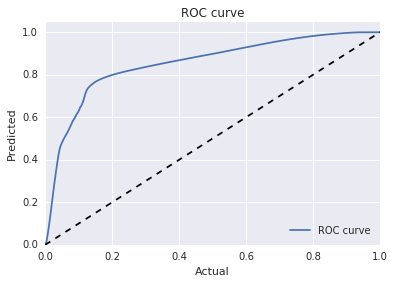

In [39]:
model,algo_name = logisticRegression(df_train_x,y_train)
accu_score, confusion_matrix = predictAndEvaluate(model, df_test_x, y_test)
# list_of_model_and_accurancySocres.append((algo_name,accu_score, model))
# out_matrix = addRowToDataFrame(confusion_matrix,y_test,col_names,out_matrix,algo_name)

Model testing has started
Model testing has completed
Accuracy Score: 0.845272105009
Confusion Matrix:
[[2627571  173162]
 [ 382691  409031]]


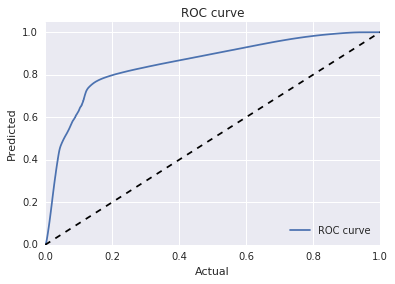

In [40]:
accu_score, confusion_matrix = predictAndEvaluate(model, df_train_x, y_train)

Random Forest model computation has started
Random Forest model computation has completed
Model testing has started
Model testing has completed
Accuracy Score: 0.939658534345
Confusion Matrix:
[[1797351   70243]
 [  74273  453103]]


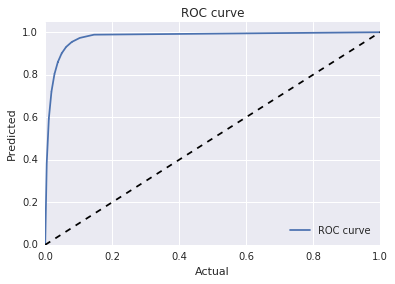

In [41]:
model, algo_name = randomForestClassifier(df_train_x, y_train)
accu_score, confusion_matrix = predictAndEvaluate(model, df_test_x, y_test)
# list_of_model_and_accurancySocres.append((algo_name,accu_score, model))
# out_matrix = addRowToDataFrame(confusion_matrix,y_test,col_names,out_matrix,algo_name)

Model testing has started
Model testing has completed
Accuracy Score: 0.996348736449
Confusion Matrix:
[[2796980    3753]
 [   9364  782358]]


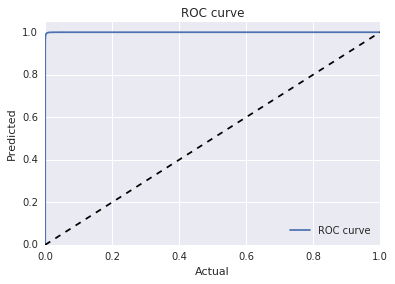

In [42]:
accu_score, confusion_matrix = predictAndEvaluate(model, df_train_x, y_train)

Neural Network based Classification model computation has started
Neural Network based Classification model computation has completed
Model testing has started
Model testing has completed
Accuracy Score: 0.779798494344
Confusion Matrix:
[[1867594       0]
 [ 527376       0]]


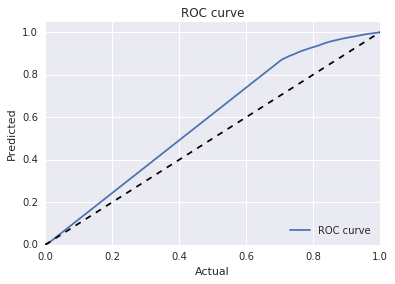

In [49]:
model, algo_name = neuralNetClassifier(df_train_x, y_train)
accu_score, confusion_matrix = predictAndEvaluate(model, df_test_x, y_test)
# list_of_model_and_accurancySocres.append((algo_name,accu_score, model))
# out_matrix = addRowToDataFrame(confusion_matrix,y_test,col_names,out_matrix,algo_name)

On 40% Test Data Set Below are Results

Logistic Regression model computation has started
Logistic Regression model computation has completed
Model testing has started
Model testing has completed
Accuracy Score: 0.998775489185
Confusion Matrix:
[[2796140    4362]
 [     37  791916]]


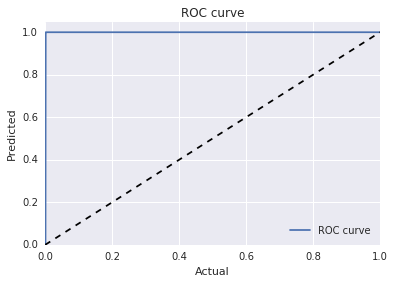

In [23]:
model,algo_name = logisticRegression(df_train_x,y_train)
accu_score, confusion_matrix = predictAndEvaluate(model, df_test_x, y_test)
# list_of_model_and_accurancySocres.append((algo_name,accu_score, model))
# out_matrix = addRowToDataFrame(confusion_matrix,y_test,col_names,out_matrix,algo_name)

Random Forest model computation has started
Random Forest model computation has completed
Model testing has started
Model testing has completed
Accuracy Score: 0.999644488975
Confusion Matrix:
[[1871152     839]
 [     14  527358]]


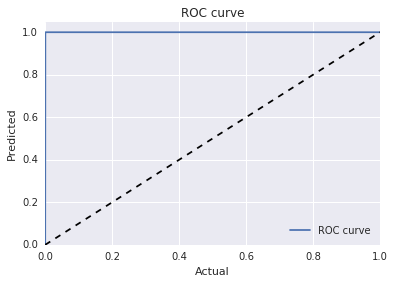

In [18]:
model, algo_name = randomForestClassifier(df_train_x, y_train)
accu_score, confusion_matrix = predictAndEvaluate(model, df_test_x, y_test)
# list_of_model_and_accurancySocres.append((algo_name,accu_score, model))
# out_matrix = addRowToDataFrame(confusion_matrix,y_test,col_names,out_matrix,algo_name)

Neural Network based Classification model computation has started
Neural Network based Classification model computation has completed
Model testing has started
Model testing has completed
Accuracy Score: 0.780203328967
Confusion Matrix:
[[1871991       0]
 [ 527372       0]]


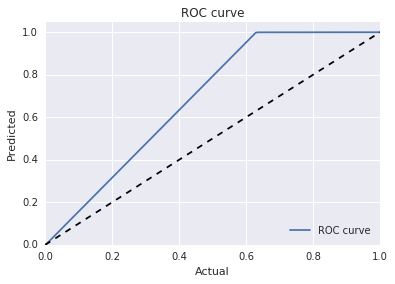

In [20]:
model, algo_name = neuralNetClassifier(df_train_x, y_train)
accu_score, confusion_matrix = predictAndEvaluate(model, df_test_x, y_test)
# list_of_model_and_accurancySocres.append((algo_name,accu_score, model))
# out_matrix = addRowToDataFrame(confusion_matrix,y_test,col_names,out_matrix,algo_name)

In [21]:
df_data_1.shape

(5998406, 11)

In [25]:
df_train_x.head()

,Amount_Requested,Employment_Length,Zip_Code,Debt-To-Income-Ratio,Policy_Code,Fico_Score,State_Factorized
2616417,15000.0,0.0,104,30.55,0,469,11
938444,9600.0,1.0,772,40.62,1,692,12
3054805,2000.0,0.0,761,19.50,0,465,12
3110086,1000.0,0.0,30,17.13,0,401,28
2157767,20000.0,0.0,606,80.87,0,438,9


In [43]:
df_data_1.to_csv('classification_final.csv',index=False)

In [47]:
df_data_1[df_data_1.grant_loan == 0].shape

(4668327, 10)

In [48]:
df_data_1[df_data_1.grant_loan == 1].shape

(1319098, 10)

In [44]:
from io import BytesIO  
import requests  
import json  
import pandas as pd

def put_file(credentials, local_file_name):  
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage V3."""
    f = open(local_file_name,'r')
    my_data = f.read()
    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': credentials['username'],'domain': {'id': credentials['domain_id']},
            'password': credentials['password']}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', credentials['container'], '/', local_file_name])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.put(url=url2, headers=headers2, data = my_data )
    print(resp2)

In [45]:
put_file(credentials_1,'classification_final.csv')

<Response [201]>
